In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../../../Risultati/NEWeather/outlier_detection_classification.csv"
df = pd.read_csv(path)
df.head()
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,imputation,r2
0,100,none,none,0.782357
1,100,none,none,0.783273
2,100,none,none,0.784418
3,100,none,none,0.783903
4,90,none,none,0.774515
...,...,...,...,...
199,50,z,none,0.757227
200,50,z,none,0.753735
201,50,z,none,0.756597
202,50,z,none,0.758944


In [3]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                    percentage        r2
outlier imputation                      
none    none         72.727273  0.766430
z       none         70.000000  0.765112
hst     none         70.000000  0.757203
lof     none         70.000000  0.753273
iforest none         70.000000  0.715725


In [4]:
top_performance = df[df['percentage']==100]['r2'].mean()
top_performance

0.783487892838743

In [5]:
df['percent_diff'] = (((df['r2'] - top_performance) / top_performance) * 100).round(2)
df

,percentage,outlier,imputation,r2,percent_diff
0,100,none,none,0.782357,-0.14
1,100,none,none,0.783273,-0.03
2,100,none,none,0.784418,0.12
3,100,none,none,0.783903,0.05
4,90,none,none,0.774515,-1.15
...,...,...,...,...,...
199,50,z,none,0.757227,-3.35
200,50,z,none,0.753735,-3.80
201,50,z,none,0.756597,-3.43
202,50,z,none,0.758944,-3.13


In [6]:
tabella = df.groupby(['outlier','imputation','percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['outlier','imputation'],ascending=False).to_csv("3_c.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier','imputation'],columns='percentage',values='percent_diff').reset_index().sort_values(by=[100,90,80,70],ascending=False)
tabella.to_csv("3_c_n.csv")

In [7]:
df_none = df[(df['outlier'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_none

,percentage,r2,percent_diff
0,50,0.753835,-3.785000e+00
1,60,0.759359,-3.078750e+00
2,70,0.764719,-2.395000e+00
3,80,0.769756,-1.753750e+00
4,90,0.775953,-9.637500e-01
5,100,0.783488,-3.469447e-18


In [8]:
df_z = df[(df['outlier'] == 'z')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_z

,percentage,r2,percent_diff
0,50,0.756419,-3.4550
1,60,0.759867,-3.0150
2,70,0.763731,-2.5225
3,80,0.769807,-1.7475
4,90,0.775738,-0.9900


In [9]:
df_lof = df[(df['outlier'] == 'lof')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof

,percentage,r2,percent_diff
0,50,0.734072,-6.30625
1,60,0.747231,-4.62875
2,70,0.755131,-3.61875
3,80,0.759860,-3.01500
4,90,0.770071,-1.71375


In [10]:
df_if = df[(df['outlier'] == 'iforest')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_if

,percentage,r2,percent_diff
0,50,0.691761,-11.70750
1,60,0.690902,-11.81625
2,70,0.697564,-10.96750
3,80,0.738837,-5.69875
4,90,0.759560,-3.05500


In [11]:
df_hst = df[(df['outlier'] == 'hst')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_hst

,percentage,r2,percent_diff
0,50,0.745227,-4.88375
1,60,0.748490,-4.46625
2,70,0.757291,-3.34250
3,80,0.763531,-2.54625
4,90,0.771474,-1.53250


[]

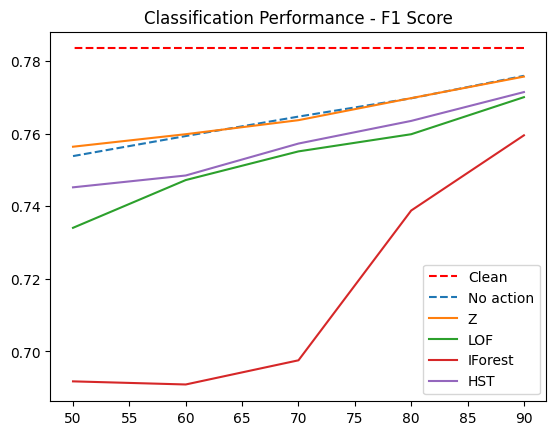

In [12]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_z['percentage'],df_z['r2'], label='Z')
plt.plot(df_lof['percentage'],df_lof['r2'], label='LOF')
plt.plot(df_if['percentage'],df_if['r2'], label='IForest')
plt.plot(df_hst['percentage'],df_hst['r2'], label='HST')
plt.title("Classification Performance - F1 Score")
plt.legend()
plt.plot()

[]

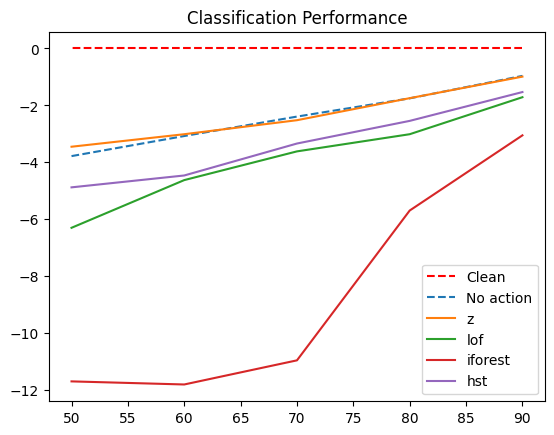

In [13]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['percent_diff'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['percent_diff'].iloc[:-1], '--', label='No action')
plt.plot(df_z['percentage'],df_z['percent_diff'], label='z')
plt.plot(df_lof['percentage'],df_lof['percent_diff'], label='lof')
plt.plot(df_if['percentage'],df_if['percent_diff'], label='iforest')
plt.plot(df_hst['percentage'],df_hst['percent_diff'], label='hst')
plt.title("Classification Performance")
plt.legend()
plt.plot()